<h1 align="center"><a href="https://github.com/sborquez/her2bdl"> Her2BDL</a> - Her2 Bayesian Deep Learning</h1>


<br>
<img src="images/utfsm.png" width="50%"/>

<h2 align="center">Model Predictions</h2>

<center>
<i> Notebook created by Sebastián Bórquez G. - <a href="mailto://sebstian.borquez.g@gmail.com">sebastian.borquez.g@gmail.com</a> - utfsm - October 2020.</i>
</center>


# Setup Notebook

The first step is to sync this notebook with Google Drive, and change directory to gerumo repository.

## (Option A) Colab Setup

Connecto to your `Google Drive` and install some dependencies.

In [ ]:
!pip list

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd "/content/drive/<Path to Project>"
!ls

## (Option B) Local Setup

Change working directory to project root.

In [1]:
%cd ..

D:\sebas\Google Drive\Projects\her2bdl


## Import Modules

In [2]:
# her2bdl packege
from her2bdl import *

# Adhoc modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from PIL import Image
from tqdm.notebook import tqdm
from IPython.core.display import display, HTML

# Model Predictions

Load and predict with your trained models. Evaluate and plot some metrics.

### Sandbox

In [125]:
image = Image.open('notebooks/images/utfsm.png')
x = np.array(image)
T = 100
num_classes = 4
prediction_samples = np.random.random((T, num_classes)) 
prediction_samples[:, 2] += 0.5*np.ones(T)
prediction_samples /= prediction_samples.sum(axis=1, keepdims=True)
predictive_distribution = prediction_samples.mean(axis=0)
y_pred = prediction_samples.mean(axis=0).argmax()
y_true = 2
uncertainty = uncertainty_df.iloc[1]

In [126]:
DEFAULT_PALETTE = "YlOrBr"
def plot_predictive_distribution(predictive_distribution, target_names=None, axis=None):
    """
    Plot predictive distribution.
    """
    # Create new figure
    if axis is None:
        plt.figure(figsize=(8,4))
        axis = plt.gca()
    if target_names is not None:
        x = np.arange(len(target_names))
        ticks = [target_names[i] for i in x]
    else:
        x = list(range(len(predictive_distribution)))
        ticks = x
    #axis.bar(x, predictive_distribution)
    sns.barplot(x=x, y=predictive_distribution, ax=axis, palette=DEFAULT_PALETTE)
    axis.set_title("Predictive Distribution")
    # Style
    axis.set_xticks(x)
    axis.set_xticklabels(ticks, rotation=45)
    axis.set_xlabel("$C_k$")
    axis.set_ylabel("$p(y=C_k|x, \mathcal{D}_{train})$")
    axis.set_ylim([0, 1])
    #axis.legend()
    return axis

def plot_forward_pass_samples(prediction_samples, y_true=None, 
                              target_names=None, axis=None):
    """
    Plot samples distribution for each class.
    """
    # Create new figure
    if axis is None:
        plt.figure(figsize=(8,4))
        axis = plt.gca()
    if target_names is not None:
        labels = [target_names[i] for i in np.arange(len(target_names))]
        labels = [f"$C_{i}$: {l}"  for i,l in enumerate(labels)]
    else:
        labels = list(range(len(prediction_samples.T)))
        labels = [f"$C_{i}$: {i}"  for i in labels]
    if y_true is not None:
        labels[y_true] = f"{labels[y_true]} (true)"  
    df = pd.DataFrame(prediction_samples, columns=labels)
    g=sns.kdeplot(data=df, ax=axis, legend=True, fill=False, palette=DEFAULT_PALETTE)
    # Style
    axis.set_title("Samples Distribution by Class")
    axis.set_xlabel("$p(y=C_k|x, \hat{\omega}_t$)")
    axis.set_ylabel("Density")
    return axis

def plot_sample(x, y_true=None, y_pred=None, target_names=None, axis=None):
    if target_names is None:
        target_names = {}
    # Create new figure
    if axis is None:
        plt.figure(figsize=(6,6))
        axis = plt.gca()
    # Image
    axis.imshow(x)
    # Hide grid lines
    axis.grid(False)
    # Hide axes ticks
    axis.set_xticks([])
    axis.set_yticks([])
    # Style
    title = f""
    if y_true is not None:
        title = f"True - $C_{y_true}$: {target_names.get(y_true, y_true)}\n"
    if y_pred is not None:
        title += f"Predicted - $C_{y_pred}$: {target_names.get(y_pred, y_pred)}"        
    axis.set_title(title, y=-0.3)
    return axis


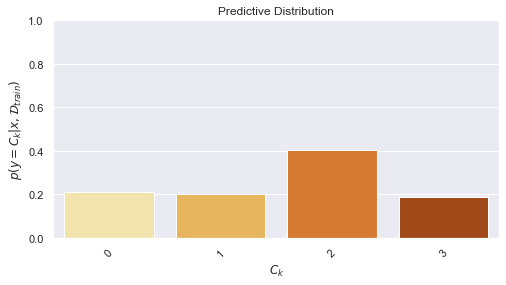

In [132]:
plot_predictive_distribution(predictive_distribution);

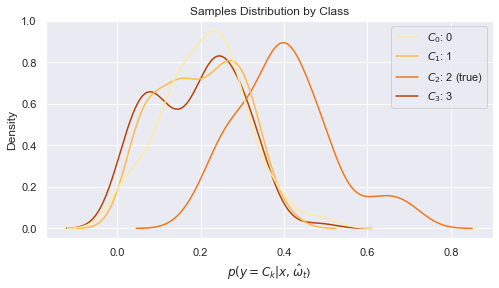

In [131]:
plot_forward_pass_samples(prediction_samples, y_true=y_true);

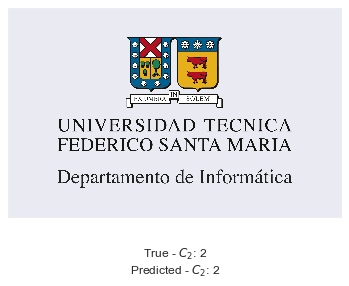

In [130]:
plot_sample(x, y_true=y_true, y_pred=y_pred);

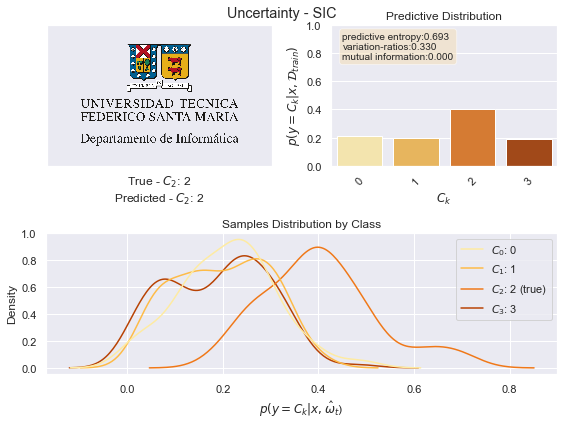

In [127]:
def display_uncertainty(x, y_pred, predictive_distribution, prediction_samples,
                        model_name=None, target_names=None,
                        y_true=None, uncertainty=None, 
                        show=False, save_to=None):
    """
    Display uncertainty for a sample x, plot predictive distribution and samples 
    class distributions.
    """
    # Create new Figure
    fig = plt.figure(figsize=(8, 6))
    ax1 = plt.subplot(221)
    plot_sample(x, y_true=y_true, y_pred=y_pred, target_names=target_names, axis=ax1)

    ax2 = plt.subplot(222)
    plot_predictive_distribution(predictive_distribution, target_names=target_names, axis=ax2)
        
    # Uncertainty 
    if uncertainty is not None:
        textstr = '\n'.join([f"{metric}:{value:.3f}" for metric, value in uncertainty.items()])
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

        # place a text box in upper left in axes coords
        ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=10, verticalalignment='top', bbox=props)

    
    ax3 = plt.subplot(212)
    plot_forward_pass_samples(prediction_samples, y_true=y_true, target_names=target_names, axis=ax3)
    plt.tight_layout()
    
    
    # Style
    title = f"Uncertainty - {model_name}" if model_name is not None else "Uncertainty"
    plt.suptitle(title)
    # Show or Save
    if save_to is not None:
        save_to = Path(save_to)
        fig.savefig(save_to.joinpath(f'{model_name}_Uncertainty.png'))
    if show:
        plt.show()
        plt.close()
        return None
    else:
        return fig
    
model_name = "SIC"
uncertainty_df = pd.DataFrame({"predictive entropy": np.array([0.0, 0.693, 0.693]), 
                               "variation-ratios":  np.array([0.0, 0.33, 0.5]),
                               "mutual information": np.array([0.0, 0.0, 0.693])})
display_uncertainty(x, y_pred, predictive_distribution, prediction_samples,
                    model_name=model_name, 
                    uncertainty=uncertainty, y_true=y_true,
                    show=True)

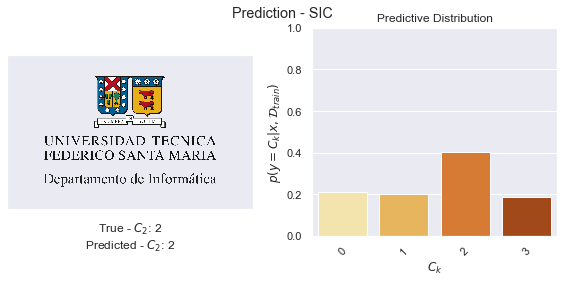

In [128]:
def display_prediction(x, y_pred, predictive_distribution, model_name=None, target_names=None, y_true=None, show=False, save_to=None):
    """
    Display the prediction of a input, the probability and the predicted point.
    If targets_values is not None, the target point is included in the figure.
    """
    # Create new Figure
    fig = plt.figure(figsize=(8, 4))
    ax1 = plt.subplot(121)
    plot_sample(x, y_true=y_true, y_pred=y_pred, target_names=target_names, axis=ax1)

    ax2 = plt.subplot(122)
    plot_predictive_distribution(predictive_distribution, target_names=target_names, axis=ax2)
    plt.tight_layout()
    # Style
    title = f"Prediction - {model_name}" if model_name is not None else "Prediction"
    plt.suptitle(title)
    # Show or Save
    if save_to is not None:
        save_to = Path(save_to)
        fig.savefig(save_to.joinpath(f'{model_name}_Prediction.png'))
    if show:
        plt.show()
        plt.close()
        return None
    else:
        return fig
display_prediction(x, y_pred, predictive_distribution,
                    model_name=model_name, 
                    y_true=y_true,
                    show=True)